# Init

In [1]:
import os

path = os.getcwd()
# find the string 'project' in the path, return index
index_project = path.find("project")
# slice the path from the index of 'project' to the end
project_path = path[: index_project + 7]
# set the working directory
os.chdir(project_path + "/src")
print(f"Project path set to: {os.getcwd()}")


Project path set to: c:\Github\new-peak-project\src


In [2]:
from dotenv import dotenv_values
config = dotenv_values(".env")
print(config["DATA_PATH"])

I:\My Drive\DAWSON PHD PROJECT\Biomarker Data Repository\data\new-peak-project\experiments


In [3]:
new_path = config["NEW_DATA_PATH"]
print(f'New data path set to: {new_path}')

New data path set to: I:\My Drive\DAWSON PHD PROJECT\Biomarker Data Repository\data\data-and-mechanism-project


# Config

In [8]:
from models.utils.config_manager import initialise_config
folder_name = 'extended-simulation-1'

initialise_config(folder_name=folder_name, verbose=1)


Folder I:\My Drive\DAWSON PHD PROJECT\Biomarker Data Repository\data\data-and-mechanism-project\extended-simulation-1 already exists. No changes made.


In [9]:
# or load existing config
from models.utils.config_manager import load_configs, print_config

config_suffix = "CuratedModel1"
loaded_config = load_configs(folder_name=folder_name, config_suffix=config_suffix)
print_config(loaded_config)

notebook: 
  version: CuratedModel1
  name: extended-simulation-1
  compatible_notebooks: ['extended-simulation-1']
  desc: CuratedModel1 - Sungyoung's example model designed by hand, captured algorithmically
Testing model responsiveness through parameter sampling over many iterations 

exp: 
  spec: 
    n_layers: 2
    n_cascades: 3
    n_regs: 0
    basal_activation: True
    custom_regulations: [['R1', 'R2', 'up'], ['R3', 'I1_2', 'up'], ['I1_1', 'I2_2', 'up'], ['I1_2', 'I2_1', 'down'], ['I1_2', 'I2_3', 'down'], ['I1_3', 'I2_2', 'up'], ['I2_1', 'R1', 'down'], ['I2_3', 'R3', 'up']]
    gen_seed: 42
    drug: 
      name: D
      start: 500
      dose: 500
      regulations: [['R1', 'down']]
      target_all: False
  parameter_generation: 
    ic_range: [200, 1000]
    param_range: [0.1, 10]
    param_mul_range: [0.99, 1.01]
  simulation: 
    start: 0
    stop: 1000
    step: 100
  parameter_sampling: 
    sampling_seed: 42
    num_models: 1000
    num_datapoints: 1000


## Load Data

In [12]:
from models.utils.config_manager import load_data

sim_results = load_data(
    notebook_config=loaded_config["notebook"],
    data_name="sim_results",
    data_format="pkl",
    verbose=1,
)

sim_results_df = load_data(
    notebook_config=loaded_config["notebook"],
    data_name="sim_results_df",
    data_format="pkl",
    verbose=1,
)

Data loaded from I:\My Drive\DAWSON PHD PROJECT\Biomarker Data Repository\data\data-and-mechanism-project\extended-simulation-1\data\CuratedModel1_sim_results.pkl
Data loaded from I:\My Drive\DAWSON PHD PROJECT\Biomarker Data Repository\data\data-and-mechanism-project\extended-simulation-1\data\CuratedModel1_sim_results_df.pkl


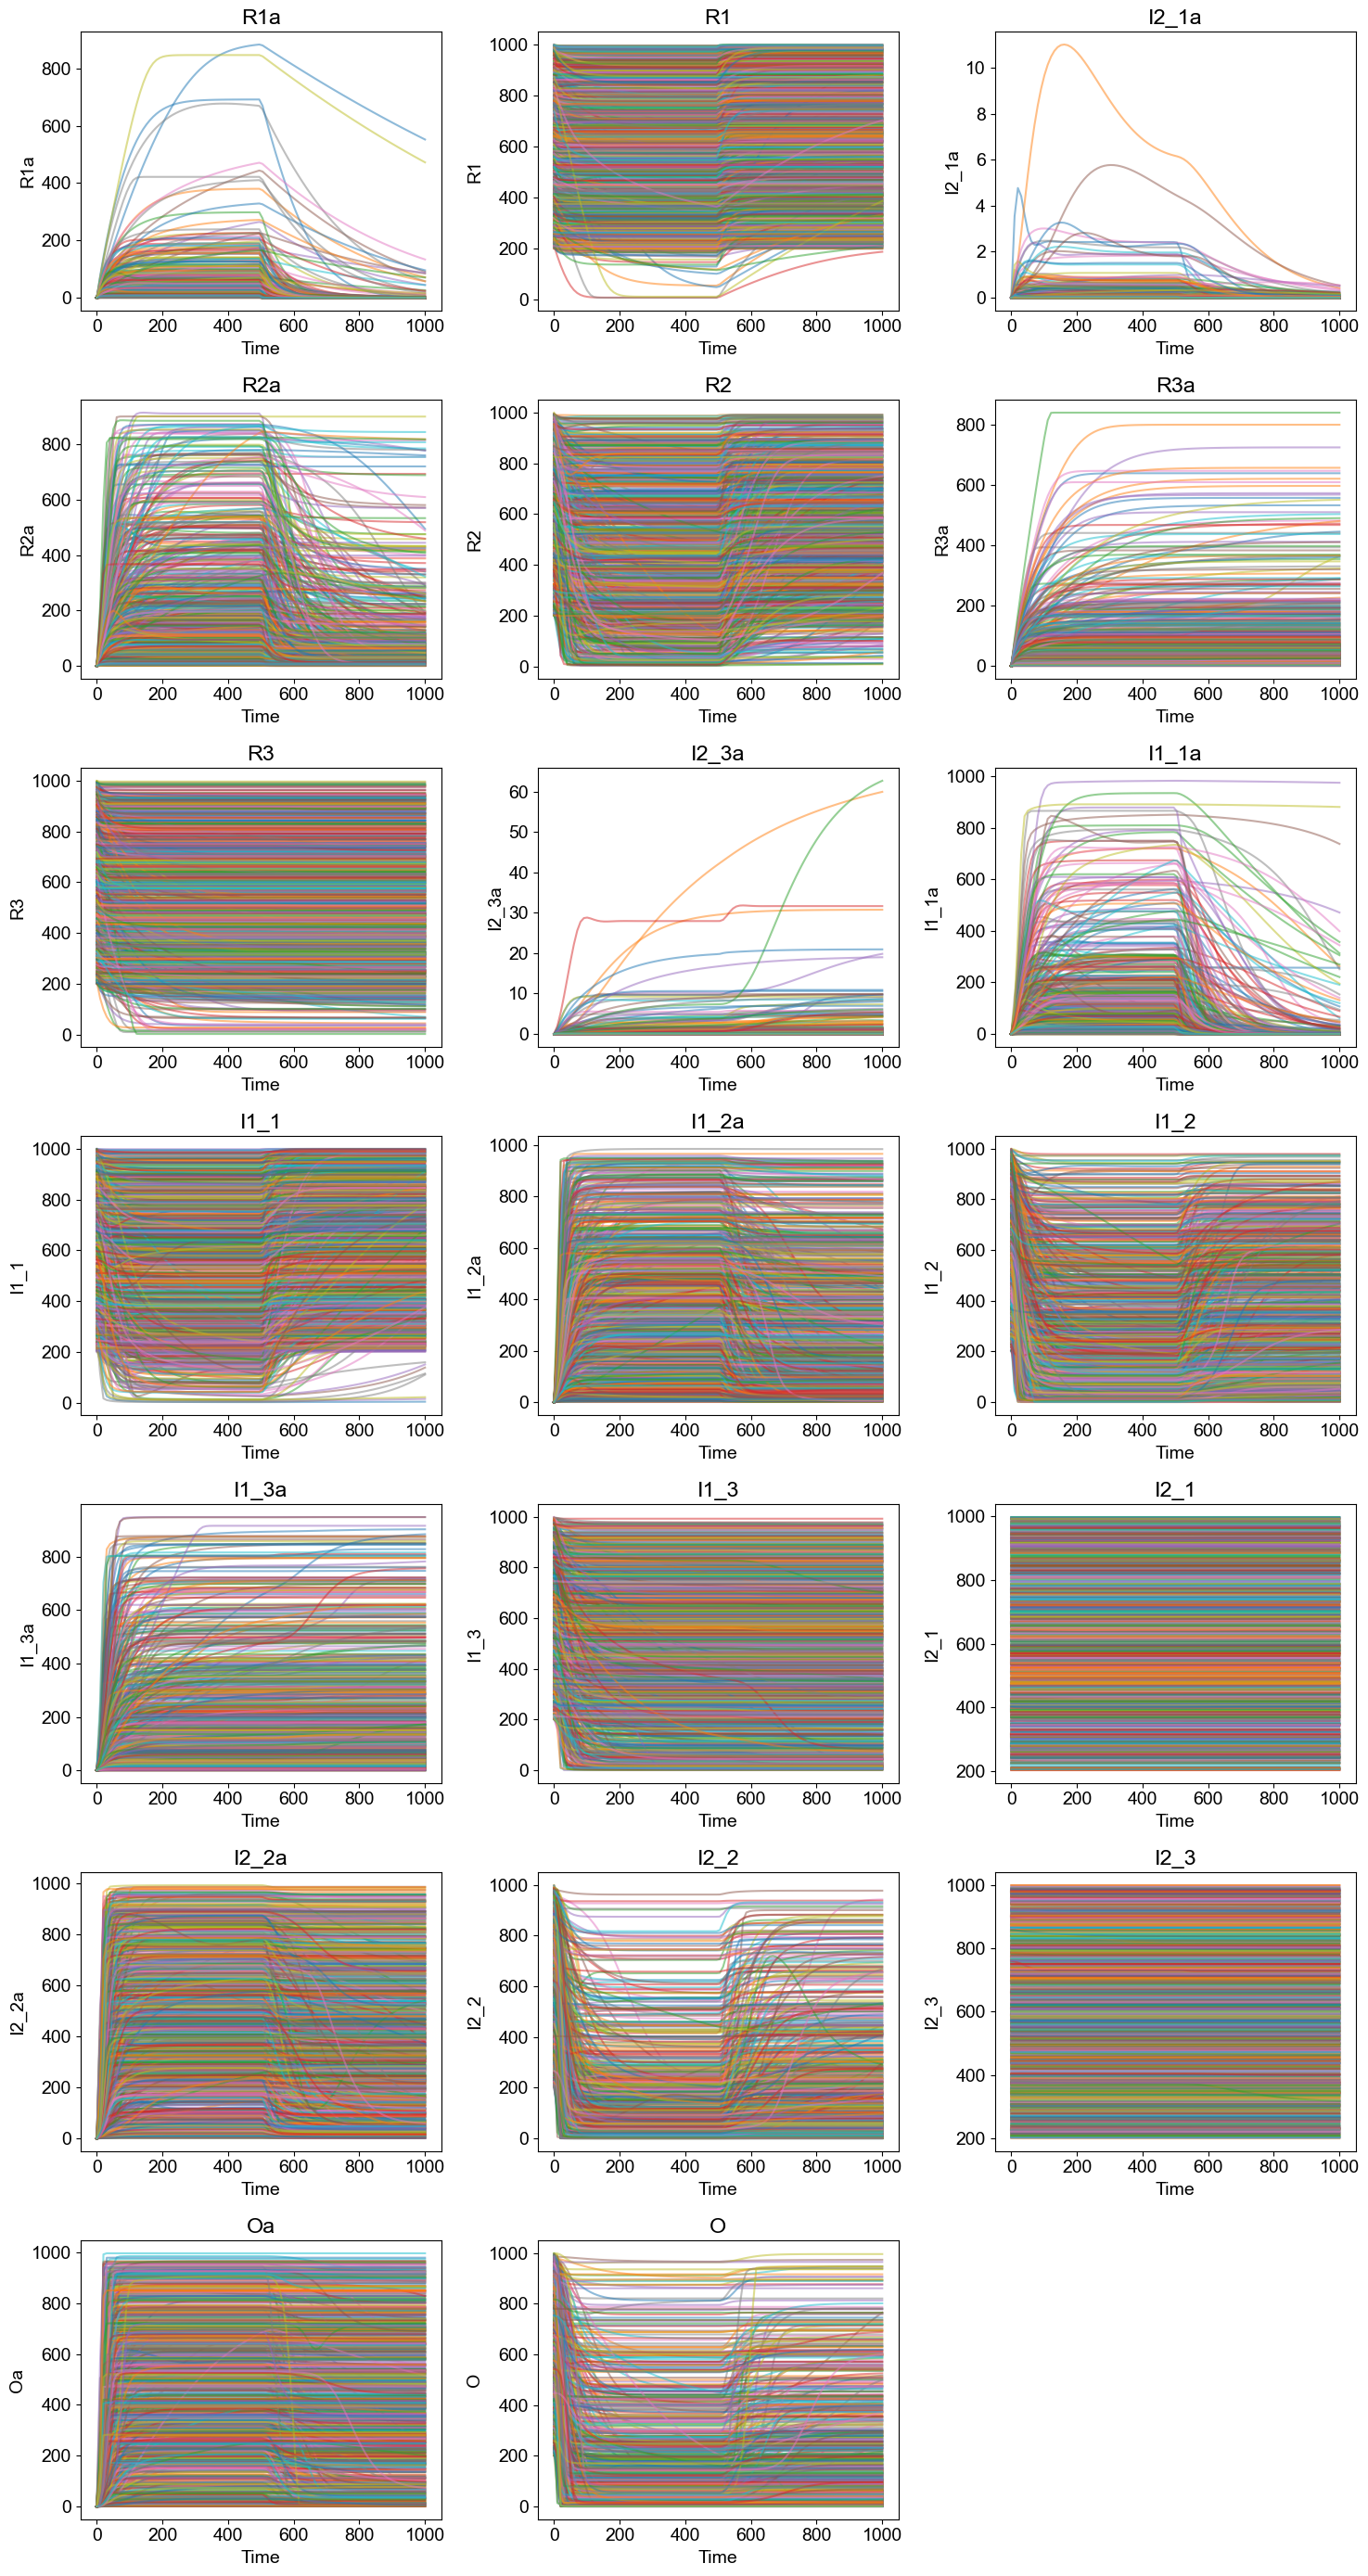

In [16]:
import matplotlib.pyplot as plt

# set font to arial 
plt.rcParams["font.family"] = "Arial"
# set font size to 14
plt.rcParams["font.size"] = 14

# Visualize all simulation results: each column (except 'time') as a subplot, all simulations overlaid
df_example = sim_results[0]
cols = [col for col in df_example.columns if col != 'time']
n_cols = 3
n_rows = (len(cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), squeeze=False)

for idx, col in enumerate(cols):
    ax = axes[idx // n_cols, idx % n_cols]
    for df in sim_results:
        ax.plot(df['time'], df[col], alpha=0.5)
    ax.set_title(col)
    ax.set_xlabel('Time')
    ax.set_ylabel(col)

# Hide any unused subplots
for i in range(len(cols), n_rows * n_cols):
    fig.delaxes(axes[i // n_cols, i % n_cols])

plt.tight_layout()
plt.show()